# <font color='blue'>ASTR 21100 

# <font color='blue'>"Computational Techniques in Astrophysics"

## <font color='blue'>Instructor: Andrey Kravtsov

## <font color='blue'>Methods for finding minimum/maximum of a function (aka optimization)
## <font color='blue'>Derivative-free methods 

Optimization is numerical computations of the function parameter values, for which the function has minimum or maximum. 

Given that any maximum of $f(\mathbf{x})$ is a minimum of $-f(\mathbf{x})$, the actual methods focus on minimizing the function.

### <font color='darkblue'>An example: optimizing the Scav Road Trip</font>
    
<p>
<center>
<img width=700 src="https://humanities-web.s3.us-east-2.amazonaws.com/college-prod/s3fs-public/styles/max_width_full/public/images/uniquely/IMG_0583.jpg?itok=qIz73XHV"></img>

### <font color='blue'>Optimizing the Scav Road Trip</font>
    
UChicago Scavenger Hunt Roadtrip portion usually requires a road team to visit $n$ locations (within 1000 miles of Chicago) and collect some number of items at each.
    
The roadtrip lasts from Thursday morning to Saturday night, so needs to be completed in 60 hours but without violating speed limits and collecting as many items as possible.  
    
To optimize the road trip we want to find a route (order of locations to visit) that
    
* Starts and ends in the same location (Chicago).

* Visits each location exactly once (except the starting location twice).

* Minimizes the total time travelled.

### <font color='blue'>Note that the function here is discontinuous</font>

Many optimization methods are based on function derivatives to find direction to the minimum. However, functions like the function that gives travel time as a function of route choices change discontinuously for different rout changes. Step-like discontinuous functions do not have a useful derivative - it is either zero or infinite. In addition, there are many functions for which derivatives are difficult to estimate. 
    
Hence, there is a need for ***derivative-free*** optimization methods. 

### <font color='blue'>Local minima vs global minimum</font>

A multi-dimensional function can have multiple peaks and valleys with minima. Usually, we are interested to find global minimum or maximum, while local extrema are a nuisance as they can fool an algorithm. 
    
Click on the image below 
<p>
<center>
<a href="http://nelder-mead.s3-website.us-east-2.amazonaws.com/"><img width=700 src="https://astro.uchicago.edu/~andrey/classes/a211/img/local_vs_global_min.PNG"></img></a>

### <font color='blue'>Other considerations for the optimization methods</font>
    
* Global minimization (find all minima) vs local minimization (find local minimum only)    
    
* Computational efficiency

* Robustness of the result: whether true minimum is found regardless of the starting guess
    
* Whether it is easy to impose boundaries on the values of the function parameters during minimum search


### <font color='blue'>A test case: sampling of the Rosenbrock "banana" distribution</font>

Rosenbrock distribution is described by the following equation in 2D (i.e. for two parameters $x$ and $y$): 

$$p_{\rm R}(x_1,x_2) = \exp\left[-c(b(x_2-x_1^2)^2 -(a-x_1)^2)\right], $$
    

which is often used for testing optimization and sampling algorithms, particularly with $a=1$, $b=100$ most often used. It has a global maximum at $(x_1,x_2)=(a,a^2)$ at which $p_{\rm R}(x_1,x_2)=1$, as is clear from the equation above. 

***Note:*** The multi-dimensional extension of the Rosenbrock function for $d$-dimensional space of parameters $\mathbf{x}=\{x_0,x_1.\ldots,x_{d-1}\}$ is

$$p_{\rm R}(\vec{x}\vert a, b,c)=\exp\left(-c\times \sum\limits_{i=1}^{d-1}\left[b(x_{i}-x_{i-1}^2)^2 + (a-x_{i-1})^2\right]\right).$$

or

$$\ln p_{\rm R}(\vec{x}\vert a, b,c) = -c\times \sum\limits_{i=1}^{d-1}\left[b(x_{i}-x_{i-1}^2)^2 + (a-x_{i-1})^2\right]$$

This function is frequently used for testing of sampling and optimization algorithms  because this function is quite "difficult" despite its benign-looking functional form. The function spans a wide range of values over small change of parameters: it has a strongly "curved" ridge in the $x-y$ plane which extends  values to large values of $x$ and $y$. 

The function is named after Howard H. Rosenbrock, who introduced it as a test case for a minimization algorithm he developed in a <a href="https://academic.oup.com/comjnl/article/3/3/175/345501">paper</a> in 1960. 

Note that $-r(\mathbf{x})$ will be a function with a long curved "ridge" instead of "valley". Such function is often used in testing sampling algorithm and we will see it again when we talk about MCMC sampling. 

The routine below that was taken from the SciPy optimize package tutorials uses Python's vector slicing to calculate the function for $a=1$, $b=100$. Note that this implementation does not explicitly deal with dimensionality of the input vector $\mathbf{x}$, this is done automatically using vector operations. Thus, the same code works for $\mathbf{x}$ of different dimensions. Below we will use this function as a test case to find its minimum for 2D and 5D cases.    

The function below computes $\ln p_{\rm R}(\vec{x})$ and uses Python's vector slicing to calculate the function for $a=1$, $b=100$. Note that this implementation does not explicitly deal with dimensionality of the input vector $\mathbf{x}$, this is done automatically using NumPy vector operations. Thus, the same code works for $\mathbf{x}$ of different dimensions.    

In [1]:
import numpy as np 
from timeit import default_timer

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_2d_dist, plot_color_map
plot_prettier()

In [9]:
def mlnrosenbrock(x, a=1., b=100., c=1.):
    """-\ln of the Rosenbrock "banana" distribution
    x is a numpy vector of points in 2 or more dimensional space
    """
    return c * sum(b*(x[1:]-x[:-1]**2.0)**2.0 + (a-x[:-1])**2.0)

In [10]:
# define a grid of x and y for calculations and plotting
xmin, xmax, ng = -10, 10, 100
ymin, ymax = -50, 100
x = np.linspace(xmin, xmax, ng)
y = np.linspace(ymin, ymax, ng)

# generate a 2d grid of x and y points
xg, yg = np.meshgrid(x, y)

# form a single array of 2D vectors 
x = np.vstack([xg.ravel(), yg.ravel()])

# compute the Rosenbrock function and reshape the output into ng x ng grid for plotting
rg = mlnrosenbrock(x).reshape((ng,ng))


The colormap below shows logarithm (base-10) of the 2D Rosenbrock function. The minimum of the function is at $[x,y]=[1,1]$. 

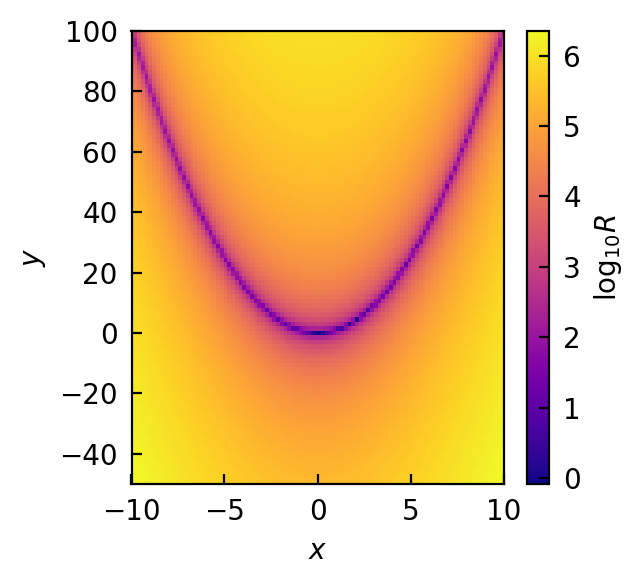

In [14]:
#xg, yg are 2D "grids" of x and y generated by meshgrid
# rg is 2D array with values of the Rosenbrock function for xg-yg grid

plot_color_map(xg, yg, np.log10(rg), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = r'$x$', ylabel = '$y$', cmap='plasma', colorbar=True, 
                   contours=False, contcmap='plasma', cbar_label=r'$\log_{10} R$',
                   figsize=3.0)


###  <font color='blue'>The Nelder-Mead (aka simplex) method</font>

There is no need for you to understand this algorithm in detail for our purposes. Just get the main idea.  Visual illustration of the algorithm, which can be found <a href="https://www.benfrederickson.com/numerical-optimization/">here</a>, can help with that.

The algorithm begins by forming an inital $(D + 1)$-dimensional polyhedron (where $D$ is the number of the minimized function parameters), or *simplex*,
of $D + 1$ points, $\mathbf{x}_i$, $i = 0, 1,\ldots, D$, that are randomly distributed throughout
the problem space domain. Indices of the points are sorted in ascending order of $f(\mathbf{x})$ so that $f(\mathbf{x}_0)$ is smallest and
$f(\mathbf{x}_D)$ is largest. It then proceeds as follows: 

1. To obtain a new trial point, $\mathbf{x}_r$, the worst point, $\mathbf{x}_D$, is reflected through the opposite face of the polyhedron using a scaling factor, $s_1$:

$$\mathbf{x}_r=\mathbf{x}_D + s_1\,(\mathbf{x}_m - \mathbf{x}_D),$$

where $\mathbf{x}_m$ is mean (the centroid) of all $\mathbf{x}$, excluding $\mathbf{x}_D$:

$$\mathbf{x}_m = \frac{1}{D}\,\sum\limits_{i=0}^{D-1}\mathbf{x}_i.$$

For example, when $D = 2$, the simplex is a triangle.

2. If $f(\mathbf{x}_r)<f(\mathbf{x}_0)$, then take another step in the same direction with scaling factor of $s_2$:

$$\mathbf{x}_e=\mathbf{x}_r + s_2\,(\mathbf{x}_m - \mathbf{x}_D),$$

If $f(\mathbf{x}_e)<f(\mathbf{x}_0)$, then $\mathbf{x}_D=\mathbf{x}_e$ and we go to step 1 above, else
    $\mathbf{x}_D=\mathbf{x}_r$.
    
3. Else if $f(\mathbf{x}_r)>f(\mathbf{x}_0)$, compare $f(\mathbf{x}_r)$ to $f(\mathbf{x}_{D-1})$ and if $f(\mathbf{x}_r)$ is smaller $\mathbf{x}_{D-1}=\mathbf{x}_r$, if not than *shrink the entire simplex* by the scaling factor of $s_3$.

This description is not fully complete, as there are a number of checks and choices made in the last step. It is meant to give an idea of how the algorithm works. It'd be easier to examine the pseudo-code for the algorithm given below.

<img width=500 src="http://astro.uchicago.edu/~andrey/classes/a211/img/simplex_pseudo_code.PNG"></img>

Using Nelder-Mead (simplex) minimization method that does not rely on function derivatives to find the minimum of the Rosenbrock function.  

In [16]:
from scipy.optimize import minimize

#x0 = [-10, 10] # 2d version 
#x0 =  np.array([0.5, 0.5, 0.5, 0.5, 0.5])
x0 = np.array([-10, 10, -5, 10, 5])

tstart = default_timer()
res = minimize(mlnrosenbrock, x0, method='nelder-mead', tol=1.e-12)
print("completed in %.3g sec"%(default_timer() - tstart))

print("minimum at :",res.x)

completed in 0.024 sec
minimum at : [0.99513568 0.98998451 0.98069012 0.96593587 0.93354015]


###  <font color='blue'>The Differential Evolution method</font>

Developed by R. Storn and K. Price in 1997 (<a href="https://link.springer.com/article/10.1023%2FA%3A1008202821328">Storn & Price 1997</a>), the <a href="https://en.wikipedia.org/wiki/Differential_evolution">differential evolution algorithm</a> is remarkably simple to implement, works in arbitrary number of dimensions, does not require function derivatives, allows imposing bounds on the domain, and is quite efficient. 

Start with $N_p$ members of the population randomly distributed in the problem domain. Vector of coordinates for each member is indexed from $0$ to $N_p-1$ and collection of all vectors $\mathbf{X}_{\rm now}=(\mathbf{x}_{\rm now,0},\mathbf{x}_{\rm now,1},\ldots,\mathbf{x}_{{\rm now},N_p-1})$ forms the current population, where each $\mathbf{x}_{\rm now,i}$ is a $D$-dimensional vector, where $D$ is the number of parameters of the minimized function.   

The algorithm then proceeds through iterations (called evolutionary or generational cycles) that lead to evolution of the population towards function minimum.

The reason the method is called "differential evolution" is because the initial population of points in $D$ dimensions can be thought of as evolving towards a minimum during algorithm iterations. The evolution is differential because it is driven by scaled differences between member locations. 

In depth description of the differential algorithm, its variations, tests, and applications can be found in a book by R. Storn, K. Price and J. Lampinen "*Differential evolution : a practical approach to global optimization*" <a href="https://catalog.lib.uchicago.edu/vufind/Record/8875926">available online</a> through U.Chicago library. 

 Each iteration (evolution cycle) consists of the "*mutation*" and "*selection*" stages for each point vector $\mathbf{x}_i$ in $\mathbf{X}_{\rm now}$ (each member of the population) that leads to formation of the new population $\mathbf{X}_{\rm next}$:

* *Mutation stage for element $i$:*  select three random indices from $0$ to $N_p-1$, $r_1$, $r_2$, $r_3$ *different* from $i$. 
Perturb element with index $r_3$ by the scaled difference of vectors with indices $r_2$ and $r_3$: 
$\mathbf{x}^\prime_i=\mathbf{x}_{{\rm now}, r_3} + s\,(\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1})$, where $s$ is a parameter. 


* *Selection stage:* if $f(\mathbf{x}^\prime_i)\leq f(\mathbf{x}_{{\rm now},i})$, then $\mathbf{x}_{{\rm next},i}=\mathbf{x}^\prime_i$, else $\mathbf{x}_{{\rm next},i}=\mathbf{x}_{{\rm now},i}$ (no mutation). 

Once all members of the population went through mutation and selection stages go back to the next iteration and $\mathbf{X}_{\rm next}$ becomes $\mathbf{X}_{\rm now}$ and the cycle repeats. 

Evolutionary cycles continue until some convergence criterion is met. For example, maximum difference between vectors in $\mathbf{X}_{\rm next}$ and $X_{\rm now}$ is smaller than the specified threshold. 

Differential evolution method is implemented in <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution"><tt>scipy.optimize.differential_evolution</tt></a> function. 

Here is pseudo-code for the simplest version of the differential evolution algorithm, which already should work quite well, but can be further improved by various modifications. 

    npop = np.size(x0)[0] # the number of population members
    fnow = func(xnow)
    xnow = np.copy(x0)
    xnext = np.zeros_like(xnow)
    ....
    while some convergence criterion is not met: 
        # xnow is a vector of coordinate vectors of the current population
        # xnext is a vector of coordinate vector of the next gen population
        for i in range(npop):
            # generate random unique indices  ir1, ir2, ir3 
            # where all indices are not equal to each other and not equal to i
            # s can be a constant for large npop, but it's more safe to make it a Gaussian random number
            xtry = xnow[ir3] + s * (xnow[ir1] - xnor[ir2])
            if func(xtry) <= fnow[i]:
                xnext[i] = xtry
            else:
                xnext[i] = xnow[i]

###  <font color='blue'>The Differential Evolution method</font>

Mutation stage of the algorithm requires that population members are in different locations, otherwise the difference $\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1}$ will be zero and location of $\mathbf{x}_{{\rm now}, r_3}$ will simply be duplicated to location of $\mathbf{x}^\prime_i$ in the mutation stage.

Thus, initial population members positions must be different. There are different ways to place population members. Assuming that we are searching for a minimum within some rectangular domain defined by the minimum and maximum values along each coordinate axis: $\mathbf{x}_{\rm min}$ and $\mathbf{x}_{\rm max}$, we can initialize the members as 

$$\mathbf{x}_0 = \mathbf{x}_{\rm min} + (\mathbf{x}_{\rm max}-\mathbf{x}_{\rm min}) \times \mathrm{rand}(0,1),$$

where $\mathrm{rand}(0,1)$ is a random number uniformly distributed from 0 to 1 (can be produced with <tt>np.random.uniform</tt>, for example). This choice makes sense if we do not know the location of the minimum and we are spreading the population members as widely as possible. To make the distribution of members more uniform, certain placement strategies can be used instead of random distribution above, such as <a href="https://www.johndcook.com/blog/2009/03/16/quasi-random-sequences-in-art-and-integration/">quasi-random sequences</a>.

Another possibility is to initialize locations of population members around a given point $\mathbf{x}_{0c}$ by using random numbers drawn from a Gaussian distribution centered at $\mathbf{x}_{0c}$ with some non-zero dispersion around it. 

 This choice makes sense if we have a good idea where the minimum is roughly, so that we can choose $\mathbf{x}_{0c}$ to be near the suspected location. 


### <font color='blue'>Modification of the DE algorithm using randomized $s$ scaling factor</font>

Although this is unlikely when the size of the evolved population is large (say $>10-20D$), for small population sizes it is possible that the same combinations of <tt>ir1, ir2, ir3</tt> will be drawn for multiple members. If the trial step is successful, this will result in multiple members having the same location. Several of such events can lead to all population members having the same location. Given that the algorithm relies on existence of multiple population members at different locations (population diversity), if population degenerates to a single point, the DE algorithm can longer work. 

To avoid this, one can replace constant scaling factor $s$ for each population member with a number randomly drawn from, say, Gaussian distribution centered at $s$ and with the rms dispersion of say $0.1s>0$ (this can be a parameter). In this case, the mutation stage will result in different locations, even if the <tt>ir1, ir2, ir3</tt> are the same for different population members. 

### <font color='blue'>Modification of the DE algorithm with the crossover stage (this section is optional for undergraduate students, but do check conclusions at the end)</font>

One of the modifications to this basic algorithm is introduction of the ***crossover stage*** so that the mutation and crossover stages together are as follows: 

* compute mutation vector $\mathbf{x}^\prime_i=\mathbf{x}_{{\rm now}, r_3} + s\,(\mathbf{x}_{{\rm now}, r_2}-\mathbf{x}_{{\rm now}, r_1})$, as before, where vector $\mathbf{x}^\prime_i$ has components $\mathbf{x}^\prime_i=[x^{\prime}_{0i}, x^{\prime}_{1i}, \ldots, x^{\prime}_{(D-1)i}]$, and $D$ is the number of parameters of the minimized function (i.e., dimensionality of the problem). 

* "***crossover stage***": form the trial vector $\mathbf{x}^{\prime\prime}_i=[x^{\prime\prime}_{0i}, x^{\prime\prime}_{1i}, \ldots, x^{\prime\prime}_{(D-1)i}]$, where 

\begin{equation}
x^{\prime\prime}_{ji} = 
\begin{cases}
x^{\prime}_{ji}, \ {\rm if\ }r_j\leq \mathrm{cr\ or\ } j= \mathrm{ir}_i,\\
x_{{\rm now},ji}, \ {\rm otherwise\ }
\end{cases}
\end{equation}

and $r_j$ is the random floating point number uniformly distributed in the interval $[0,1]$ that is generated for the index $j$, and $\mathrm{ir}_i$ is the random integer uniformly distributed in the range $[0, D-1]$ generated for index $i$, which ensures that $\mathbf{x}^{\prime\prime}_i$ gets at least one element from $\mathbf{x}^\prime_i$. The crossover parameter $\mathrm{cr}\in [0,1]$ is a constant set by user. 

* *Selection stage:* if $f(\mathbf{x}^{\prime\prime}_i)\leq f(\mathbf{x}_{{\rm now},i})$, then $\mathbf{x}_{{\rm next},i}=\mathbf{x}^{\prime\prime}_i$, else $\mathbf{x}_{{\rm next},i}=\mathbf{x}_{{\rm now},i}$ (no mutation). 


In [6]:
from scipy.optimize import differential_evolution
from time import time

xmin, xmax, ymin, ymax = -10., 10., -10., 10.
#x0 = [0.5, 0.5]
#bounds = [(xmin, xmax), (ymin, ymax)]
bounds = [(xmin, xmax), (ymin, ymax), (xmin, xmax), (ymin, ymax), (xmin, xmax)]

tstart = time()
res = differential_evolution(mlnrosenbrock, bounds, strategy='rand1bin', mutation=0.5, recombination=1.0,
                             popsize=50)

print("completed in %.3g sec"%(time() - tstart))
print("minimum at :",res.x)

completed in 6.09 sec
minimum at : [1. 1. 1. 1. 1.]


In [7]:
tstart = time()
res = differential_evolution(mlnrosenbrock, bounds, mutation=0.1, recombination=0.7, strategy='rand1bin',
                             popsize=50)

print("completed in %.3g sec"%(time() - tstart))
print("minimum at :",res.x)

completed in 1.55 sec
minimum at : [0.9999994  0.99999934 0.99999817 0.99999601 0.99999209]


### <font color='blue'>DE algorithm: parallelization</font>

Each iteration of the DE algorithm can be fairly easily parallelized because mutation and selection of each population member is independent. This allows using large population sizes and is particularly useful when function evaluation is expensive. 

### <font color='blue'>Take-home messages</font>

* Correct results are not always guaranteed. Results need to be checked by re-running from different starting points and using different methods. 


* Methods differ significantly in the number of function evaluations they need to determine the minimum to the required accuracy. 

* Not all methods allow enforcing parameter bounds or other type of constraints on $\mathbf{x}$. 

### <font color='blue'>Additional recommended reading</font>

* <a href="https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/">Tutorial on the differential evolution algorithm with visualizations</a>

